In [2]:
from collections import Counter
import os
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sys 

In [ ]:
! chmod +x ./algorithms/evomine
! chmod +x ./algorithms/germ


In [5]:
import importlib

import file_converters as f
import running_algorithms as r
import general_mapping as g
import analysis as a
import drawing as d 
import canonical as c

def pretty_now():
    from datetime import datetime
    ts = datetime.now()
    return f"{ts.hour}:{ts.minute}:{ts.second}.{ts.microsecond}"

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from importlib import reload
reload(f)

reload(r)

reload(g)

reload(a)

reload(d)
reload(c)

<module 'canonical' from '/root/work/canonical.py'>

<img src = './imgs/pipeline.png' width = 90%>

# TUTORIAL ON LITTLE GRAPH

## Convert 
from raw to input

In [ ]:
f.from_txtfile_to_gerinput(input_path = './raw-datasets/dblp0305.txt', 
                           output_path = './input-files/[ger-ready]-dblp0305.txt', 
                           separator = ' ')

removed ./input-files/[ger-ready]-dblp0305.txt
Edge list converted, ger format file saved in  ./input-files/[ger-ready]-dblp0305.txt


## Run
algorithm and rename/save output where you want

In [ ]:
s = 5000
m = 3

In [ ]:
algorithm = 'EvoMine'
r.run_algorithm(algo = algorithm, 
              sup = s, 
              maxedge = m, 
              filename = './input-files/[ger-ready]-dblp0305.txt', 
              outputfile = f'[{algorithm}]dblp0305.{s}.{m}.txt',  
              directed = False,
              projection='full',
              #edge_color=True,
              #node_color=True,
              verbose = True,superverbose = False)

Running command:
./algorithms/evomine -s 5000 -e 3 -T full -t -u -f ./input-files/[ger-ready]-dblp0305.txt > /dev/null
Output moved from ./input-files/[ger-ready]-dblp0305.txt.out.evomine.FULL.5000.3 to [EvoMine]dblp0305.5000.3.txt


## Convert 
from output to ger list

In [ ]:
e_info_list, e_patterns, e_support_patterns, e_mapping = f.from_ger_output(f'./output-files/[EvoMine]dblp0305.5000.3.txt')

In [ ]:
e_pattern_list, e_support = f.obtain_pattern_list(e_patterns, e_support_patterns, algorithm = 'evomine')

## Canonical code
faster computation of a general mapping thanks to the bliss algorithm in the igraph implementation

In [ ]:
reload(c)
e_new_pattern_list_can, e_new_support_can = c.mapping_pattern_ids(e_pattern_list, e_support, 
                                                          mapped_patterns_path = f'./processed-outputs/[canonical]-dblp0305.{s}.{m}'
                                                         )

## Analysis
The GER profile


In [ ]:
g_general_mapping_can = pickle.load(open('general_mapping_canonical.p','rb') )
rules_canonical = list(g_general_mapping_can.keys())
rules_short = [g_general_mapping_can[c][0] for c in rules_canonical]
e_profile_can = a.get_profiles(e_new_support_can, rules_short, './processed-outputs/',)

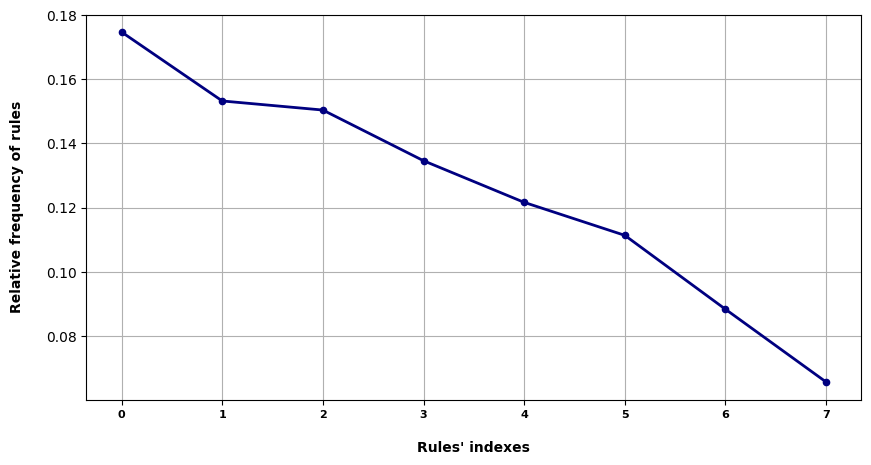

In [ ]:
a.plot_profile(e_profile_can, rules_short)

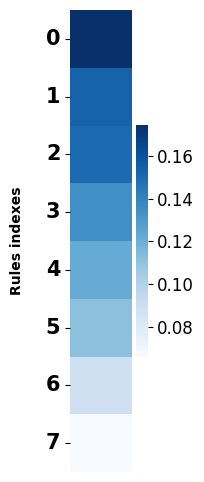

In [ ]:
a.plot_heatmap(e_profile_can, 
               rules_short,
               fs=(1,6),
               cbar_ticks_size = 12,
               ticks_params = {'fontsize_x':25, 'rotation_x':0,'fontweight_x':'bold',
                                'fontsize_y':15, 'rotation_y':0,'fontweight_y':'bold'},
              label_params = {'xlabel': "", 'fontsize_x' :10, 'fontweight_x':'bold',
                                'ylabel': "Rules indexes\n", 'fontsize_y' :10, 'fontweight_y':'bold'})


## Drawing 

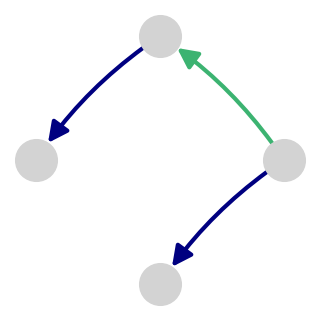

In [ ]:
d.draw_pattern_ger('EvoMine', [p['edges'] for p in e_new_pattern_list_can.values()][6],
                             w = 3,h = 3)

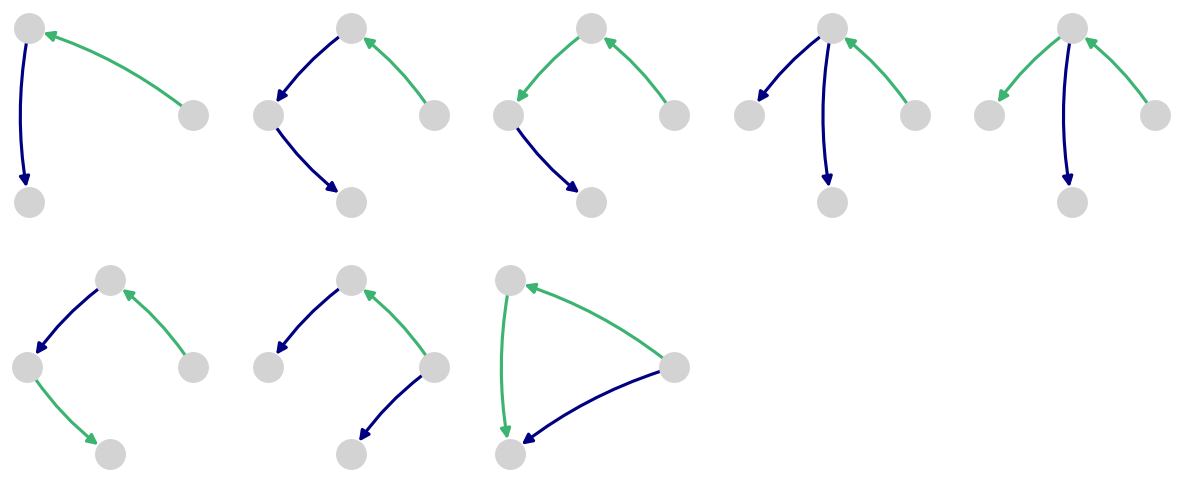

In [ ]:
reload(d)
edge_lists = [v['edges'] for v in e_new_pattern_list_can.values()]
d.draw_several_patterns('Evomine', edge_lists, 
                          columns = 5, w_box = 3)


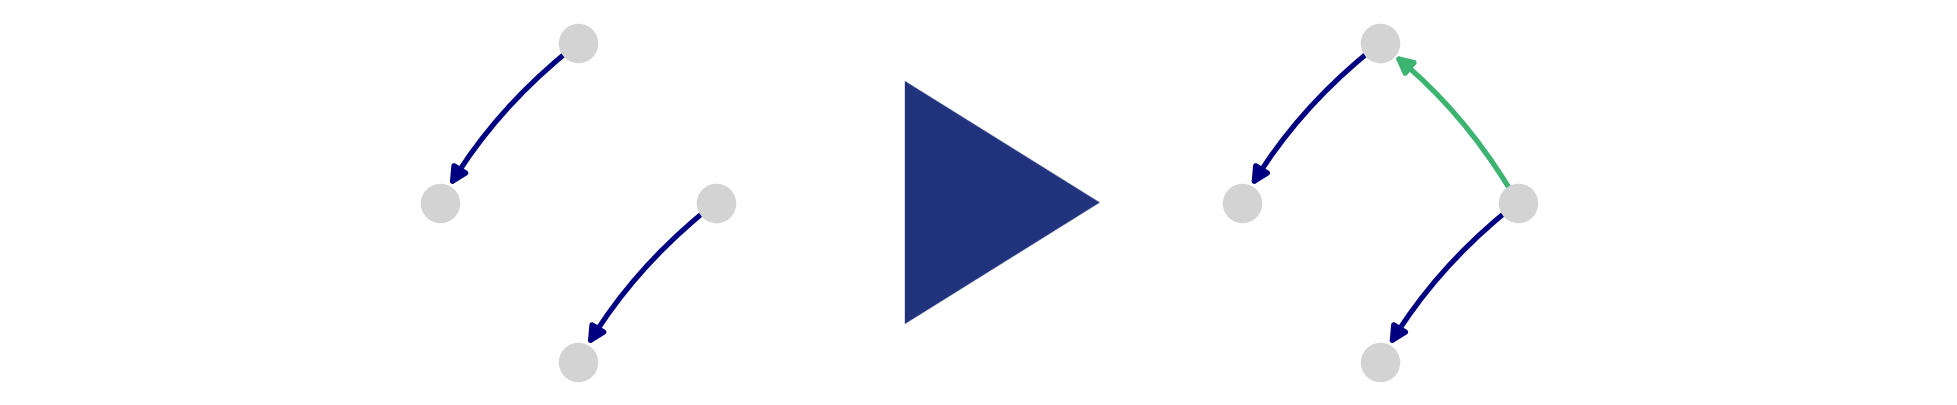

In [ ]:
d.draw_rule('evomine', [p['edges'] for p in e_new_pattern_list_can.values()][6], w_box = 5)

# Application to web3 networks

## step by step
Let's start with Steemit Follow: a subnetwork collection from follow operations of the STEEMIT platform (https://steemit.com/)


In [ ]:
sf = pd.read_csv('./raw-datasets/steemit_follow.csv', names= ['source','target','ts'], delimiter=';')
       

In [ ]:
f.from_edgelists_to_gerinput(edges_list = sf.values.tolist(),
                           dataset_path = './input-files/[ger-ready]-SF.txt')

removed ./input-files/[ger-ready]-SF.txt
Edge list converted, ger format file saved in  ./input-files/[ger-ready]-SF.txt


In [ ]:
s = 50000
m = 3

In [ ]:
pretty_now()

'10:13:33.427654'

In [ ]:
algorithm = 'EvoMine'
r.run_algorithm(algo = algorithm, 
              sup = s, 
              maxedge = m, 
              filename = './input-files/[ger-ready]-SF.txt', 
              outputfile = f'./output-files/[{algorithm}]SF-event.{s}.{m}.txt',  
              directed = False,
              projection='event',
              #edge_color=True,
              #node_color=True,
              verbose = True,superverbose = False)

Running command:
/data-restricted/home/alessia_galdeman/geranio/geranio/algorithms/evomine -s 50000 -e 3 -T event -t -u -f ./input-files/[ger-ready]-SF.txt > /dev/null
Output moved from ./input-files/[ger-ready]-SF.txt.out.evomine.EVENT.50000.3 to ./output-files/[EvoMine]SF-event.50000.3.txt


cp: cannot stat '[ger-ready]-SF.txt.out.evomine.EVENT.50000.3': No such file or directory
rm: cannot remove '[ger-ready]-SF.txt.out.evomine.EVENT.50000.3': No such file or directory


In [ ]:
e_info_list, e_patterns, e_support_patterns, e_mapping = f.from_ger_output(f'./output-files/[EvoMine]SF-event.{s}.{m}.txt')

In [ ]:
e_pattern_list, e_support = f.obtain_pattern_list(e_patterns, e_support_patterns, algorithm = 'EvoMine')

In [ ]:
# first time you run everything 
pickle.dump({}, open('general_mapping_canonical.p','wb') )

In [ ]:
reload(c)
e_new_pattern_list_can, e_new_support_can = c.mapping_pattern_ids(e_pattern_list, e_support, 
                                                          mapped_patterns_path = f'./processed-outputs/[canonical]-SF.{s}.{m}'
                                                         )

## Pre-cooked ger outputs

In [14]:
filename = 'SF-event.50000.3'
res_SF = f.from_ger_output(f'./output-files/[EvoMine]{filename}.txt')
mapped_SF = c.mapping_pattern_ids(*f.obtain_pattern_list(res_SF[1], res_SF[2], algorithm = 'EvoMine'),
                                  mapped_patterns_path = f'./processed-outputs/[canonical]{filename}.txt',
                                  general_mapping_name = 'general_mapping_canonical_web3.p',
                                  general_mapping_updatename = 'general_mapping_canonical_web3.p',
                                  check_meaningfull=True)

__Steemit transfer__ <br>Cryptocurrency transfer operation on Steemit

In [15]:
filename = 'ST-event.30000.3'
res_ST = f.from_ger_output(f'./output-files/[EvoMine]{filename}.txt')
mapped_ST = c.mapping_pattern_ids(*f.obtain_pattern_list(res_ST[1], res_ST[2], algorithm = 'EvoMine'),
                                  mapped_patterns_path = f'./processed-outputs/[canonical]{filename}.txt',
                                  general_mapping_name = 'general_mapping_canonical_web3.p',
                                  general_mapping_updatename = 'general_mapping_canonical_web3',
                                  check_meaningfull=True)

__OpenSea__ <br> Subnetwork of NFT transfers on the OpenSea market. Dataset here: https://osf.io/xnj3k?view_only=319a53cf1bf542bbbe538aba37916537

In [16]:
filename = 'NFTO-event.10000.3'
res_NFTO = f.from_ger_output(f'./output-files/[EvoMine]{filename}.txt')
mapped_NFTO = c.mapping_pattern_ids(*f.obtain_pattern_list(res_NFTO[1], res_NFTO[2], algorithm = 'EvoMine'),
                                    mapped_patterns_path = f'./processed-outputs/[canonical]{filename}.txt',
                                  general_mapping_name = 'general_mapping_canonical_web3.p',
                                  general_mapping_updatename = 'general_mapping_canonical_web3',
                                  check_meaningfull=True)

__Cryptokitties__ <br> Subnetwork of NFT transfers on the Cryptokitties market. Same dataset as OpenSea

In [17]:
filename = 'NFTC-event.150000.3'
res_NFTC = f.from_ger_output(f'./output-files/[EvoMine]{filename}.txt')
mapped_NFTC = c.mapping_pattern_ids(*f.obtain_pattern_list(res_NFTC[1], res_NFTC[2], algorithm = 'EvoMine'),
                                    mapped_patterns_path = f'./processed-outputs/[canonical]{filename}.txt',
                                  general_mapping_name = 'general_mapping_canonical_web3.p',
                                  general_mapping_updatename = 'general_mapping_canonical_web3',
                                  check_meaningfull=True)

## GER profiles

In [18]:
general_mapping_can = pickle.load(open('general_mapping_canonical_web3.p','rb') )
rules_canonical = list(general_mapping_can.keys())
rules_short = [general_mapping_can[c][0] for c in rules_canonical]


profiles = [a.get_profiles(sup_can[1], rules_short, './processed-outputs/') for sup_can in [mapped_SF,mapped_ST, mapped_NFTC, mapped_NFTO]]

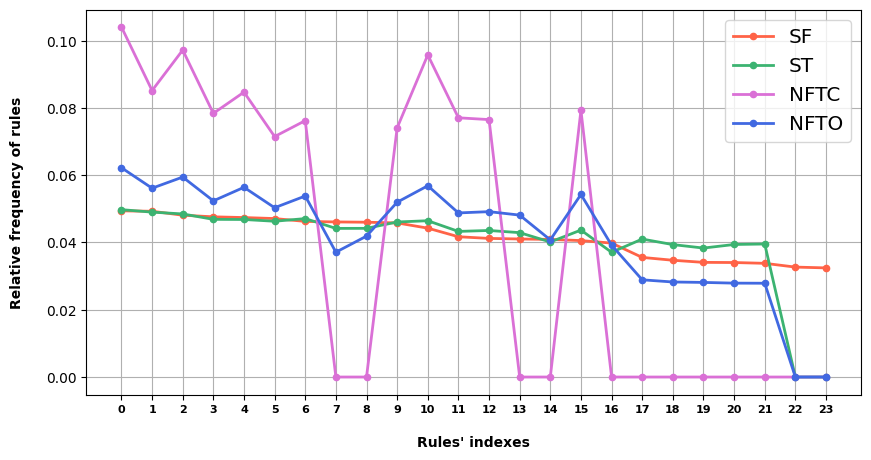

In [19]:
a.plot_profile(profiles, rules_short,single_profile=False, cmap=['tomato','mediumseagreen','orchid','royalblue'], 
               legend = True,labels = ['SF','ST','NFTC','NFTO'] )

## Insights

Cryptokitties is the only network not showing rule 16 (closed triangle). This can be explained by the nature of the network, whose relationships is given by the game and not by social purposes.

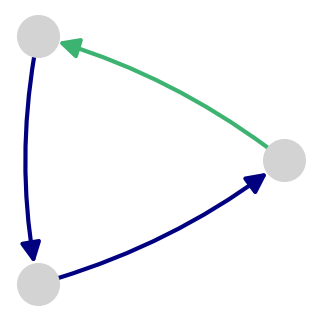

In [20]:
which_rule = 16
d.draw_pattern_ger('EvoMine', general_mapping_can[rules_canonical[which_rule]][1]['edges'],
                             w = 3,h = 3)

A simple expansion rule like 10 is frequent in every network, while rules 22,23 appears only in Steemit-follow. The represent reciprocal behavior in their evolution and they're frequent in the only network with a social nature, since it represents follow operations

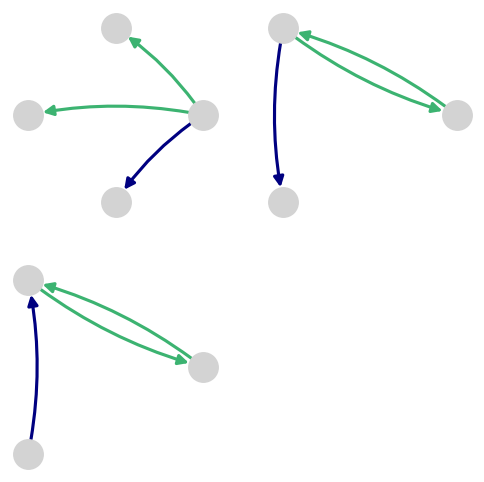

In [22]:
to_draw = [10,22,23]
edge_lists = {values[0]:values[1]['edges'] for values in general_mapping_can.values()}
edge_lists = [edge_lists[p] for p in to_draw]
d.draw_several_patterns('Evomine',edge_lists , 
                          columns = 2, w_box = 3)

# BONUS visualization

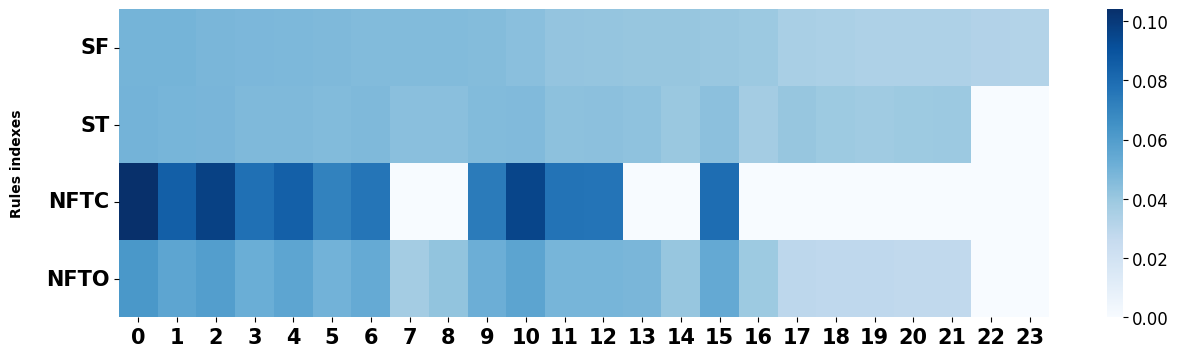

In [23]:
a.plot_heatmap(profiles, 
               rules_short,
               single_profile=False,
               fs=(15,4),
               vertical_rules=False,
               cbar_ticks_size = 12,
               xticks=['SF','ST','NFTC','NFTO'],
               ticks_params = {'fontsize_x':15, 'rotation_x':0,'fontweight_x':'bold',
                                'fontsize_y':15, 'rotation_y':0,'fontweight_y':'bold'},
              label_params = {'xlabel': "", 'fontsize_x' :10, 'fontweight_x':'bold',
                                'ylabel': "Rules indexes\n", 'fontsize_y' :10, 'fontweight_y':'bold'})


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=610e0907-6802-4939-b7da-d8a5a67aba28' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>